#Female-Related Themes in Jane Austen’s Novels

In [1]:
import os
import re
import nltk
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
books = [
    '/content/Jane Austen___Emma.txt',
    '/content/Jane Austen___Lady Susan.txt',
    '/content/Jane Austen___Love And Freindship And Other Early Works.txt',
    '/content/Jane Austen___Mansfield Park.txt',
    '/content/Jane Austen___Northanger Abbey.txt',
    '/content/Jane Austen___Persuasion.txt',
    '/content/Jane Austen___Pride and Prejudice.txt',
    '/content/Jane Austen___Sense and Sensibility.txt'
]

In [3]:
stop_words = set(stopwords.words('english'))

def preprocess_text(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read().lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

In [4]:
female_terms = ['woman', 'women', 'female', 'females','she', 'her', 'hers']
marriage_terms = ['marriage', 'marriages', 'marry', 'married', 'husband', 'husbands', 'wife', 'wives']
economic_terms = ['money', 'fortune', 'fortunes', 'property', 'properties', 'income', 'incomes', 'wealth']

In [5]:
book_tokens = {}

for book in books:
    name = os.path.basename(book).replace('.txt', '')
    book_tokens[name] = preprocess_text(book)

In [6]:
def count_terms(tokens, term_list):
    counter = Counter(tokens)
    return sum(counter[t] for t in term_list)

In [7]:
rows = []

for book, tokens in book_tokens.items():
    total_words = len(tokens)
    rows.append({
        'book': book,
        'female_terms': count_terms(tokens, female_terms) / total_words * 10000,
        'marriage_terms': count_terms(tokens, marriage_terms) / total_words * 10000,
        'economic_terms': count_terms(tokens, economic_terms) / total_words * 10000
    })

df = pd.DataFrame(rows)
df

,book,female_terms,marriage_terms,economic_terms
0,Jane Austen___Emma,19.383575,32.855847,8.660746
1,Jane Austen___Lady Susan,25.375756,61.487410,9.759906
2,Jane Austen___Love And Freindship And Other Ea...,20.516214,61.548643,21.178028
3,Jane Austen___Mansfield Park,14.678540,19.850978,12.581606
4,Jane Austen___Northanger Abbey,16.440841,13.039288,17.007767
5,Jane Austen___Persuasion,22.312639,41.212758,17.062607
6,Jane Austen___Pride and Prejudice,15.333504,48.921178,16.063671
7,Jane Austen___Sense and Sensibility,13.937930,39.955399,19.327263


In [8]:
def co_occurrence(tokens, target_terms, context_terms, window=5):
    count = 0
    for i, token in enumerate(tokens):
        if token in target_terms:
            start = max(0, i - window)
            end = min(len(tokens), i + window + 1)
            context = tokens[start:end]
            count += sum(1 for t in context if t in context_terms)
    return count

In [9]:
co_rows = []

for book, tokens in book_tokens.items():
    co_rows.append({
        'book': book,
        'marriage_economic': co_occurrence(tokens, marriage_terms, economic_terms)
    })

co_df = pd.DataFrame(co_rows)
co_df

,book,marriage_economic
0,Jane Austen___Emma,3
1,Jane Austen___Lady Susan,3
2,Jane Austen___Love And Freindship And Other Ea...,5
3,Jane Austen___Mansfield Park,4
4,Jane Austen___Northanger Abbey,8
5,Jane Austen___Persuasion,10
6,Jane Austen___Pride and Prejudice,15
7,Jane Austen___Sense and Sensibility,5


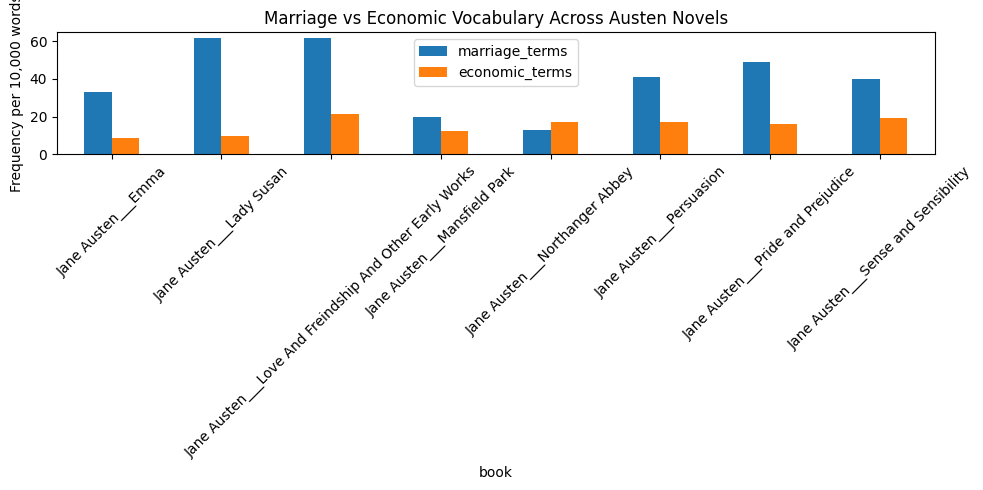

In [10]:
df.plot(
    x='book',
    y=['marriage_terms', 'economic_terms'],
    kind='bar',
    figsize=(10,5)
)
plt.title('Marriage vs Economic Vocabulary Across Austen Novels')
plt.ylabel('Frequency per 10,000 words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

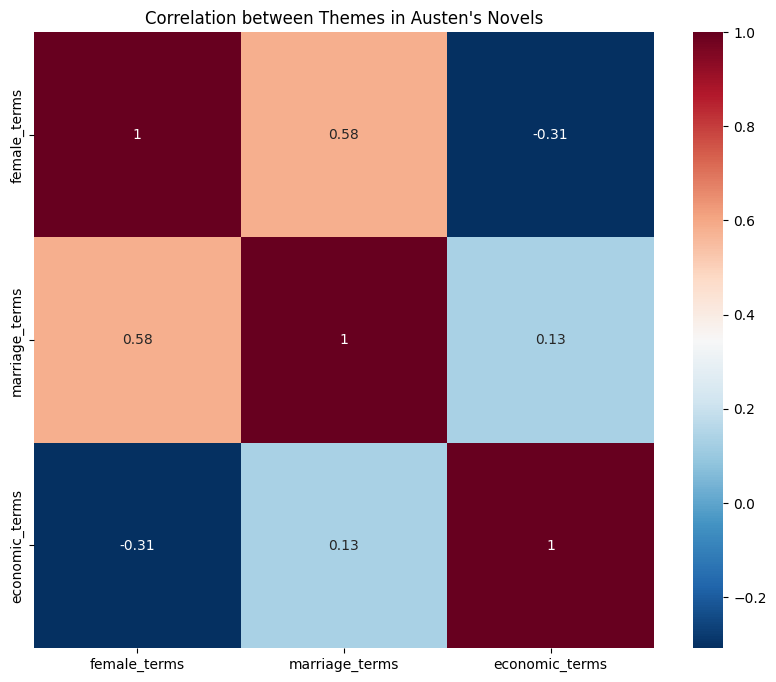

In [11]:
import seaborn as sns

correlation_matrix = df[['female_terms', 'marriage_terms', 'economic_terms']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation between Themes in Austen\'s Novels')
plt.show()